In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pickle
import datetime 
import re


In [ ]:
path6169 = r'C:\Users\Personal\Desktop\Donationsss\Donation_usecase\donors_in_campaign_6169.csv'
path7244 = r'C:\Users\Personal\Desktop\Donationsss\Donation_usecase\donors_in_campaign_7244.csv'

df_6169 = pd.read_csv(path6169)
df_7244 = pd.read_csv(path7244)
df_6169.head()

In [3]:
df_X = pd.get_dummies(data=df_6169, columns=['gender', 'language', 'generation'])

df_X.head()

,Unnamed: 0,donorID,zipcode,year,age,amount,recency,freq,amount_class,gender_F,gender_M,language_EN,language_FR,language_NL,generation_Boomer,generation_genX,generation_genY,generation_genZ
0,0,100001,1861.0,1967.0,52.0,178.49,-50273.0,12.0,1,1,0,0,0,1,0,1,0,0
1,1,100002,2260.0,1952.0,68.0,20.00,-2071.0,1.0,1,0,1,0,0,1,1,0,0,0
2,2,100004,1020.0,1952.0,68.0,716.22,-118787.0,26.0,1,1,0,0,1,0,1,0,0,0
3,3,100008,1780.0,1937.0,83.0,124.37,-12760.0,3.0,1,0,1,0,1,0,1,0,0,0
4,4,100009,1020.0,1932.0,88.0,326.78,-77210.0,19.0,1,0,1,0,1,0,1,0,0,0


In [4]:
df_X.isnull().sum().sort_values(ascending=False).head()

generation_genZ    0
generation_genY    0
donorID            0
zipcode            0
year               0
dtype: int64

In [5]:
feature_cols = ['zipcode', 'year', 'age', 'amount', 'recency', 'freq','gender_F','gender_M', 'language_EN', 'language_FR', 'language_NL', 'generation_Boomer','generation_genX', 'generation_genY', 'generation_genZ']
X = df_X[feature_cols]
y = df_X['amount_class']

In [6]:
from sklearn.preprocessing import StandardScaler
X[['zipcode', 'year', 'age', 'amount', 'recency', 'freq']] = StandardScaler().fit_transform(X[['zipcode', 'year', 'age', 'amount', 'recency', 'freq']])

C:\Users\Personal\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Personal\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [7]:
X.head()

,zipcode,year,age,amount,recency,freq,gender_F,gender_M,language_EN,language_FR,language_NL,generation_Boomer,generation_genX,generation_genY,generation_genZ
0,-1.129421,-0.133810,0.090247,0.195576,-1.071792,0.955918,1,0,0,0,1,0,1,0,0
1,-1.002105,-1.077254,1.096449,-0.322130,0.441644,-0.418764,0,1,0,0,1,1,0,0,0
2,-1.397774,-1.077254,1.096449,1.952065,-3.222980,2.705514,1,0,0,1,0,1,0,0,0
3,-1.155267,-2.020698,2.039763,0.018793,0.106033,-0.168822,0,1,0,1,0,1,0,0,0
4,-1.397774,-2.335179,2.354202,0.679963,-1.917554,1.830716,0,1,0,1,0,1,0,0,0


In [8]:
y=y.astype('int')

In [9]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: amount_class, dtype: int32

## Logistics Regression

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25)


In [11]:
#import the class
from sklearn.linear_model import LogisticRegression

#instantiate the model using default parameteres
logreg = LogisticRegression()

#fit/train the model
logreg.fit(X_train, y_train)

#perform prediction on the test set 
y_pred = logreg.predict(X_test)

#check model accuracy
logreg.score(X_test,y_test)

C:\Users\Personal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9785353535353535

In [12]:
len(y_test), len(y_pred), len(X_test)

(8712, 8712, 8712)

In [13]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 785,  163],
       [  24, 7740]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

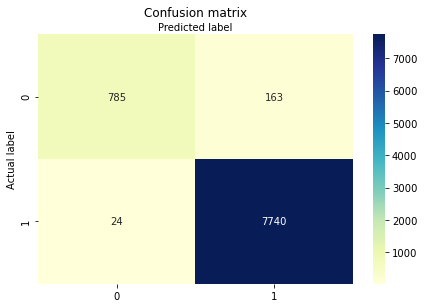

In [14]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [15]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("BAS:", metrics.balanced_accuracy_score(y_test, y_pred))

Accuracy: 0.9785353535353535
Precision: 0.9793749209161078
Recall: 0.9969088098918083
BAS: 0.9124839408108831


In [16]:
pickle.dump(logreg, open(r'C:\Users\Personal\Desktop\Donationsss\Donation_usecase\logreg.pkl', 'wb'))

In [17]:
logreg = pickle.load(open(r'C:\Users\Personal\Desktop\Donationsss\Donation_usecase\logreg.pkl', 'rb'))

### Test on 7244

In [22]:
df_X_7244 = pd.get_dummies(data=df_7244, columns=['gender', 'language', 'generation'])

In [23]:
feature_cols_7244 = ['zipcode', 'year', 'age', 'amount', 'recency', 'freq','gender_F','gender_M', 'language_EN', 'language_FR', 'language_NL', 'generation_Boomer','generation_genX', 'generation_genY', 'generation_genZ']
X_7244 = df_X_7244[feature_cols]
y_7244 = df_X_7244['amount_class']

In [25]:
X_7244.head()

,zipcode,year,age,amount,recency,freq,gender_F,gender_M,language_EN,language_FR,language_NL,generation_Boomer,generation_genX,generation_genY,generation_genZ
0,1861,1967,52,178.49,-50273,12,1,0,0,0,1,0,1,0,0
1,2260,1952,68,20.00,-2071,1,0,1,0,0,1,1,0,0,0
2,1780,1937,83,124.37,-12760,3,0,1,0,1,0,1,0,0,0
3,1020,1932,88,326.78,-77210,19,0,1,0,1,0,1,0,0,0
4,1020,1983,37,40.00,-2068,1,0,1,0,1,0,0,0,1,0


In [26]:
y_7244.head()

0    1
1    1
2    1
3    1
4    1
Name: amount_class, dtype: int64

In [27]:
from sklearn.preprocessing import StandardScaler
X_7244[['zipcode', 'year', 'age', 'amount', 'recency', 'freq']] = StandardScaler().fit_transform(X_7244[['zipcode', 'year', 'age', 'amount', 'recency', 'freq']])

C:\Users\Personal\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Personal\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [28]:
X_7244.head()

,zipcode,year,age,amount,recency,freq,gender_F,gender_M,language_EN,language_FR,language_NL,generation_Boomer,generation_genX,generation_genY,generation_genZ
0,-1.143136,-0.141679,0.097855,0.199723,-1.157087,1.048957,1,0,0,0,1,0,1,0,0
1,-1.015547,-1.090230,1.109577,-0.310190,0.449105,-0.444956,0,1,0,0,1,1,0,0,0
2,-1.169038,-2.038782,2.058066,0.025602,0.092925,-0.173335,0,1,0,1,0,1,0,0,0
3,-1.412066,-2.354965,2.374229,0.676819,-2.054685,1.999629,0,1,0,1,0,1,0,0,0
4,-1.412066,0.870109,-0.850634,-0.245843,0.449205,-0.444956,0,1,0,1,0,0,0,1,0


In [29]:
#perform prediction on the test set 
y_pred_7244 = logreg.predict(X_7244)

#check model accuracy
logreg.score(X_7244,y_7244)

0.9567320822441575

In [30]:
print("Accuracy:",metrics.accuracy_score(y_7244, y_pred_7244))
print("Precision:",metrics.precision_score(y_7244, y_pred_7244))
print("Recall:",metrics.recall_score(y_7244,y_pred_7244))
print("BAS:", metrics.balanced_accuracy_score(y_7244, y_pred_7244))

Accuracy: 0.9567320822441575
Precision: 0.9527980325322518
Recall: 0.9993212055389628
BAS: 0.8448346757952385


## Logistics Regression on Average amount

In [3]:
path6169 = r'C:\Users\Personal\Desktop\Donationsss\Donation_usecase\model_files_on_average_amount\donors_in_campaign_6169.csv'


df_6169 = pd.read_csv(path6169)
df_newdonors = pd.read_csv(path_new)
df_6169.head()

,Unnamed: 0,donorID,zipcode,gender,language,year,age,amount,recency,freq,amount_class,avg_amount,generation,avg_amount_class
0,0,100001,1861.0,F,NL,1967.0,52.0,178.49,50273.0,12.0,1,14.874167,genX,1
1,1,100002,2260.0,M,NL,1952.0,68.0,20.00,2071.0,1.0,1,20.000000,Boomer,1
2,2,100004,1020.0,F,FR,1952.0,68.0,716.22,118787.0,26.0,1,27.546923,Boomer,1
3,3,100008,1780.0,M,FR,1937.0,83.0,124.37,12760.0,3.0,1,41.456667,Boomer,1
4,4,100009,1020.0,M,FR,1932.0,88.0,326.78,77210.0,19.0,1,17.198947,Boomer,1


In [4]:
df_X = pd.get_dummies(data=df_6169, columns=['gender', 'language', 'generation'])

df_X.head()

,Unnamed: 0,donorID,zipcode,year,age,amount,recency,freq,amount_class,avg_amount,avg_amount_class,gender_F,gender_M,language_EN,language_FR,language_NL,generation_Boomer,generation_genX,generation_genY,generation_genZ
0,0,100001,1861.0,1967.0,52.0,178.49,50273.0,12.0,1,14.874167,1,1,0,0,0,1,0,1,0,0
1,1,100002,2260.0,1952.0,68.0,20.00,2071.0,1.0,1,20.000000,1,0,1,0,0,1,1,0,0,0
2,2,100004,1020.0,1952.0,68.0,716.22,118787.0,26.0,1,27.546923,1,1,0,0,1,0,1,0,0,0
3,3,100008,1780.0,1937.0,83.0,124.37,12760.0,3.0,1,41.456667,1,0,1,0,1,0,1,0,0,0
4,4,100009,1020.0,1932.0,88.0,326.78,77210.0,19.0,1,17.198947,1,0,1,0,1,0,1,0,0,0


In [6]:
feature_cols = ['zipcode', 'year', 'age', 'amount','avg_amount', 'recency', 'freq','gender_F','gender_M', 'language_EN', 'language_FR', 'language_NL', 'generation_Boomer','generation_genX', 'generation_genY', 'generation_genZ']
X = df_X[feature_cols]
y = df_X['avg_amount_class']

In [7]:
from sklearn.preprocessing import StandardScaler
X[['zipcode', 'year', 'age', 'amount', 'avg_amount', 'recency', 'freq']] = StandardScaler().fit_transform(X[['zipcode', 'year', 'age', 'amount','avg_amount','recency', 'freq']])

C:\Users\Personal\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Personal\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [8]:
X.head()

,zipcode,year,age,amount,avg_amount,recency,freq,gender_F,gender_M,language_EN,language_FR,language_NL,generation_Boomer,generation_genX,generation_genY,generation_genZ
0,-1.129421,-0.133810,0.090247,0.195576,-0.159159,1.071792,0.955918,1,0,0,0,1,0,1,0,0
1,-1.002105,-1.077254,1.096449,-0.322130,-0.100055,-0.441644,-0.418764,0,1,0,0,1,1,0,0,0
2,-1.397774,-1.077254,1.096449,1.952065,-0.013033,3.222980,2.705514,1,0,0,1,0,1,0,0,0
3,-1.155267,-2.020698,2.039763,0.018793,0.147356,-0.106033,-0.168822,0,1,0,1,0,1,0,0,0
4,-1.397774,-2.335179,2.354202,0.679963,-0.132353,1.917554,1.830716,0,1,0,1,0,1,0,0,0


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25)


In [25]:
#import the class
from sklearn.linear_model import LogisticRegression

#instantiate the model using default parameteres
logreg1 = LogisticRegression()

#fit/train the model
logreg1.fit(X_train, y_train)

#perform prediction on the test set 
y_pred = logreg1.predict(X_test)

#check model accuracy
logreg1.score(X_test,y_test)

C:\Users\Personal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9923094582185491

In [26]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[1683,    1],
       [  66, 6962]], dtype=int64)

In [27]:
pickle.dump(logreg1, open(r'C:\Users\Personal\Desktop\Donationsss\Donation_usecase\logreg1.pkl', 'wb'))

In [28]:
logreg1 = pickle.load(open(r'C:\Users\Personal\Desktop\Donationsss\Donation_usecase\logreg1.pkl', 'rb'))

In [29]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("BAS:", metrics.balanced_accuracy_score(y_test, y_pred))

Accuracy: 0.9923094582185491
Precision: 0.9998563837426396
Recall: 0.9906089926010244
BAS: 0.995007584186498


### test on new_donors

In [61]:
path_new = r'C:\Users\Personal\Desktop\Donationsss\Donation_usecase\model_files_on_average_amount\new_donors.csv'

In [62]:
df_newdonors = pd.read_csv(path_new)

In [63]:
df_newdonors.head()

,Unnamed: 0,donorID,zipcode,gender,language,year,age,amount,recency,freq,amount_class,avg_amount,generation,avg_amount_class
0,28,100067,1050,M,NL,1969,50,20.0,3949,1,1,20.000000,genX,1
1,29,100069,1060,M,FR,1962,57,39.0,2067,1,1,39.000000,Boomer,1
2,57,100132,1150,F,FR,1953,67,30.0,1547,1,1,30.000000,Boomer,1
3,75,100164,1180,M,NL,1953,67,427.0,22620,11,1,38.818182,Boomer,1
4,92,100186,1190,M,FR,1978,42,60.0,3244,2,1,30.000000,genX,1


In [64]:
df_X_new = pd.get_dummies(data=df_newdonors, columns=['gender', 'language', 'generation'])

df_X_new.head()

,Unnamed: 0,donorID,zipcode,year,age,amount,recency,freq,amount_class,avg_amount,avg_amount_class,gender_F,gender_M,language_FR,language_NL,generation_Boomer,generation_genX,generation_genY
0,28,100067,1050,1969,50,20.0,3949,1,1,20.000000,1,0,1,0,1,0,1,0
1,29,100069,1060,1962,57,39.0,2067,1,1,39.000000,1,0,1,1,0,1,0,0
2,57,100132,1150,1953,67,30.0,1547,1,1,30.000000,1,1,0,1,0,1,0,0
3,75,100164,1180,1953,67,427.0,22620,11,1,38.818182,1,0,1,0,1,1,0,0
4,92,100186,1190,1978,42,60.0,3244,2,1,30.000000,1,0,1,1,0,0,1,0


In [65]:
df_X_new['language_EN'] = 0
df_X_new['generation_genZ'] = 0
df_X_new.head()

,Unnamed: 0,donorID,zipcode,year,age,amount,recency,freq,amount_class,avg_amount,avg_amount_class,gender_F,gender_M,language_FR,language_NL,generation_Boomer,generation_genX,generation_genY,language_EN,generation_genZ
0,28,100067,1050,1969,50,20.0,3949,1,1,20.000000,1,0,1,0,1,0,1,0,0,0
1,29,100069,1060,1962,57,39.0,2067,1,1,39.000000,1,0,1,1,0,1,0,0,0,0
2,57,100132,1150,1953,67,30.0,1547,1,1,30.000000,1,1,0,1,0,1,0,0,0,0
3,75,100164,1180,1953,67,427.0,22620,11,1,38.818182,1,0,1,0,1,1,0,0,0,0
4,92,100186,1190,1978,42,60.0,3244,2,1,30.000000,1,0,1,1,0,0,1,0,0,0


In [71]:
feature_cols = ['zipcode', 'year', 'age', 'amount','avg_amount', 'recency', 'freq','gender_F','gender_M', 'language_EN', 'language_FR', 'language_NL', 'generation_Boomer','generation_genX', 'generation_genY', 'generation_genZ']
X_new = df_X_new[feature_cols]
y_new = df_X_new['avg_amount_class']

In [72]:
from sklearn.preprocessing import StandardScaler
X_new[['zipcode', 'year', 'age', 'amount', 'avg_amount', 'recency', 'freq']] = StandardScaler().fit_transform(X_new[['zipcode', 'year', 'age', 'amount','avg_amount','recency', 'freq']])

C:\Users\Personal\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Personal\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [73]:
#perform prediction on the test set 
y_pred_new = logreg1.predict(X_new)

#check model accuracy
logreg1.score(X_new,y_new)

0.8883405305367057

In [75]:
print("Accuracy:",metrics.accuracy_score(y_new, y_pred_new))
print("Precision:",metrics.precision_score(y_new, y_pred_new))
print("Recall:",metrics.recall_score(y_new, y_pred_new))
print("BAS:", metrics.balanced_accuracy_score(y_new, y_pred_new))

Accuracy: 0.8883405305367057
Precision: 1.0
Recall: 0.8412280701754385
BAS: 0.9206140350877192


## Rank IDs based on engagement and last date of donations

In [2]:
path = r'C:\Users\Personal\Desktop\Donationsss\Donation_usecase\rank_based_on_engagement.csv'

In [3]:
df = pd.read_csv(path)

In [4]:
df.head()

,donorID,engaged_donations,non_engaged_donations,total_donations,engaged%,non_engaged%,last_donation_date
0,100001,8,4,12,67%,33%,12/30/2011
1,100002,1,0,1,100%,0%,10/1/2015
2,100003,9,3,12,75%,25%,8/3/2019
3,100004,12,14,26,46%,54%,5/2/2011
4,100005,3,2,5,60%,40%,4/18/2019


In [5]:
#add column for engagement rank
def selector(row):
    if row['engaged_donations'] >= 2 or row['non_engaged_donations'] >= 2:
        return 'good'
    else:
        return 'bad'

df['enagement_rank'] = df.apply(lambda row : selector(row), axis=1)

In [6]:
#add column for date rank
df['date'] = pd.to_datetime(df["last_donation_date"],yearfirst=True)
df['year'] = pd.DatetimeIndex(df['last_donation_date']).year

def selector2(row):
    if row['year'] >= 2017:
        return 'good'
    else:
        return 'bad'

df['date_rank'] = df.apply(lambda row : selector2(row), axis=1)


In [7]:
df.head()

,donorID,engaged_donations,non_engaged_donations,total_donations,engaged%,non_engaged%,last_donation_date,enagement_rank,date,year,date_rank
0,100001,8,4,12,67%,33%,12/30/2011,good,2011-12-30,2011,bad
1,100002,1,0,1,100%,0%,10/1/2015,bad,2015-10-01,2015,bad
2,100003,9,3,12,75%,25%,8/3/2019,good,2019-08-03,2019,good
3,100004,12,14,26,46%,54%,5/2/2011,good,2011-05-02,2011,bad
4,100005,3,2,5,60%,40%,4/18/2019,good,2019-04-18,2019,good


In [8]:
#add final rank column
def selector3(row):
    if row['enagement_rank'] == 'good' and row['date_rank'] == 'good':
        return 'good_donor'
    else:
        return 'bad_donor'

df['donor_category'] = df.apply(lambda row : selector3(row), axis=1)

In [9]:
df.head()

,donorID,engaged_donations,non_engaged_donations,total_donations,engaged%,non_engaged%,last_donation_date,enagement_rank,date,year,date_rank,donor_category
0,100001,8,4,12,67%,33%,12/30/2011,good,2011-12-30,2011,bad,bad_donor
1,100002,1,0,1,100%,0%,10/1/2015,bad,2015-10-01,2015,bad,bad_donor
2,100003,9,3,12,75%,25%,8/3/2019,good,2019-08-03,2019,good,good_donor
3,100004,12,14,26,46%,54%,5/2/2011,good,2011-05-02,2011,bad,bad_donor
4,100005,3,2,5,60%,40%,4/18/2019,good,2019-04-18,2019,good,good_donor


In [10]:
path2 = r'C:\Users\Personal\Desktop\Donationsss\Donation_usecase\selected_donors.csv'

df_selected = pd.read_csv(path2)

In [11]:
df_selected.drop('Unnamed: 0', axis=1, inplace=True)

In [12]:
df_selected.head()
df_selected.shape

(26493, 2)

In [13]:
df_merged = pd.merge(df, df_selected, how = 'inner', on = 'donorID')

In [14]:
df_merged.shape

(26493, 13)

In [15]:
df_merged.head()

,donorID,engaged_donations,non_engaged_donations,total_donations,engaged%,non_engaged%,last_donation_date,enagement_rank,date,year,date_rank,donor_category,prediction
0,100001,8,4,12,67%,33%,12/30/2011,good,2011-12-30,2011,bad,bad_donor,1
1,100003,9,3,12,75%,25%,8/3/2019,good,2019-08-03,2019,good,good_donor,1
2,100004,12,14,26,46%,54%,5/2/2011,good,2011-05-02,2011,bad,bad_donor,1
3,100006,0,1,1,0%,100%,8/15/2017,bad,2017-08-15,2017,good,bad_donor,1
4,100009,11,8,19,58%,42%,3/25/2012,good,2012-03-25,2012,bad,bad_donor,1


In [16]:
df_merged.shape

(26493, 13)

In [17]:
df_good = df_merged[df_merged.donor_category == 'good_donor']

In [25]:
df_good

,donorID,engaged_donations,non_engaged_donations,total_donations,engaged%,non_engaged%,last_donation_date,enagement_rank,date,year,date_rank,donor_category,prediction
1,100003,9,3,12,75%,25%,8/3/2019,good,2019-08-03,2019,good,good_donor,1
13,100020,5,3,8,63%,38%,7/24/2017,good,2017-07-24,2017,good,good_donor,1
14,100023,3,1,4,75%,25%,10/4/2019,good,2019-10-04,2019,good,good_donor,1
16,100027,5,2,7,71%,29%,8/31/2019,good,2019-08-31,2019,good,good_donor,1
20,100033,3,1,4,75%,25%,5/31/2018,good,2018-05-31,2018,good,good_donor,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26471,144656,2,0,2,100%,0%,7/25/2019,good,2019-07-25,2019,good,good_donor,1
26477,144665,1,2,3,33%,67%,7/3/2017,good,2017-07-03,2017,good,good_donor,1
26480,144668,2,2,4,50%,50%,11/20/2019,good,2019-11-20,2019,good,good_donor,1
26489,144688,5,2,7,71%,29%,7/27/2017,good,2017-07-27,2017,good,good_donor,1


In [19]:
df_good.shape

(4760, 13)

In [20]:
path3 = r'C:\Users\Personal\Desktop\Donationsss\df_campaigns_donors.csv'

In [21]:
df_campaign = pd.read_csv(path3)

In [22]:
df_merged_campaign = pd.merge(df_campaign, df_good, how = 'inner', on = 'donorID')

In [23]:
df_merged_campaign.drop('Unnamed: 0', axis=1, inplace=True)

In [24]:
df_merged_campaign.shape

(41971, 27)

In [225]:
df_merged_campaign.groupby('campaignID').count()[['donorID']].sort_values(by= 'donorID', ascending=False)

,donorID
campaignID,
6169.0,1071
5326.0,670
4137.0,457
4687.0,409
3189.0,397
...,...
7335.0,1
663.0,1
1678.0,1


## Letters answered percentage

In [22]:
path4 = r'C:\Users\Personal\Desktop\Donationsss\df_campaigns_donors.csv'
path5 = r'C:\Users\Personal\Desktop\Donationsss\Donation_usecase\campaigns.csv'

df = pd.read_csv(path4)
df_campaigns = pd.read_csv(path5, sep = ';')

df_campaigns['lettersSent'] = df_campaigns['lettersSent'].apply(lambda x: re.sub(r'\s+(\d{3})', r'\1', x))
df_campaigns['lettersSent'] = df_campaigns['lettersSent'].astype(float)
df_campaigns['CostUnit'] = [x.replace(',', '.') for x in df_campaigns['CostUnit']]
df_campaigns['CostUnit'] = [x.replace('€', '') for x in df_campaigns['CostUnit']]
df_campaigns['CostUnit'] = df_campaigns['CostUnit'].astype(float)


df.drop('Unnamed: 0',axis=1, inplace=True)

df = df[df.spontaneity == 'not_spontaneous']

In [24]:
df.head()

,campaignID,date_x,CostUnit,lettersSent,total_expense,donorID,amount,date_y,recency,_merge,date_campaign,date_donation,difference,spontaneity,spontaneity_class
0,153.0,13/12/2004,0.17,6873.0,1168.41,104748,24.79,12/26/2004,-5739,both,12/13/2004,12/26/2004,13 days 00:00:00.000000000,not_spontaneous,0
1,153.0,13/12/2004,0.17,6873.0,1168.41,106068,30.00,1/1/2005,-5733,both,12/13/2004,1/1/2005,19 days 00:00:00.000000000,not_spontaneous,0
2,153.0,13/12/2004,0.17,6873.0,1168.41,118588,30.00,1/2/2005,-5732,both,12/13/2004,2/1/2005,50 days 00:00:00.000000000,not_spontaneous,0
3,153.0,13/12/2004,0.17,6873.0,1168.41,120234,12.39,12/18/2004,-5747,both,12/13/2004,12/18/2004,5 days 00:00:00.000000000,not_spontaneous,0
4,153.0,13/12/2004,0.17,6873.0,1168.41,124978,2.50,1/1/2005,-5733,both,12/13/2004,1/1/2005,19 days 00:00:00.000000000,not_spontaneous,0


In [30]:
df = df.groupby('campaignID').agg({'lettersSent':'count'})

In [31]:
df.head()

,lettersSent
campaignID,
153.0,6
154.0,1
180.0,1
433.0,2
498.0,1


In [32]:
df_letters_answered = pd.merge(df_campaigns, df, how = 'inner', on = 'campaignID')

In [33]:
df_letters_answered.head()

,campaignID,date,lettersSent_x,CostUnit,lettersSent_y
0,153,13/12/2004,6873.0,0.17,6
1,154,01/01/2005,7656.0,0.30,1
2,180,18/01/2005,9933.0,0.20,1
3,433,29/01/2005,7448.0,0.59,2
4,498,22/02/2005,5441.0,0.20,1


In [36]:
df_letters_answered['%_letters_answered'] = (df_letters_answered['lettersSent_y']/df_letters_answered['lettersSent_x'])*100

In [38]:
df_letters_answered.sort_values(by = '%_letters_answered', ascending = False)

,campaignID,date,lettersSent_x,CostUnit,lettersSent_y,%_letters_answered
163,3049,19/12/2011,21282.0,0.20,2022,9.500987
162,3033,09/12/2011,18667.0,0.21,1116,5.978465
160,2994,05/11/2011,23838.0,0.30,1316,5.520597
164,3064,30/12/2011,20249.0,0.61,1098,5.422490
67,1634,08/12/2007,34080.0,0.21,1790,5.252347
...,...,...,...,...,...,...
5,574,29/03/2005,8986.0,0.40,1,0.011128
276,4431,19/09/2016,9169.0,0.12,1,0.010906
343,7356,08/09/2019,9619.0,0.26,1,0.010396
2,180,18/01/2005,9933.0,0.20,1,0.010067


## Year on year donations

In [7]:
path6 = r'C:\Users\Personal\Desktop\Donationsss\Donation_usecase\gifts.csv'

df_gifts = pd.read_csv(path6)
df_gifts.drop('Unnamed: 0',axis=1, inplace = True)
df_gifts['year']= pd.DatetimeIndex(df_gifts['date']).year

df_gifts['amount'] = [x.replace(',', '.') for x in df_gifts['amount']]
df_gifts['amount'] = df_gifts['amount'].astype(float)


In [8]:
df_gifts.head()

,donorID,campaignID,amount,date,year
0,100001,NaN,12.39,2004-03-23,2004
1,100001,1577.0,12.39,2007-10-11,2007
2,100001,1634.0,6.69,2007-12-28,2007
3,100001,1778.0,24.79,2008-06-14,2008
4,100001,1808.0,7.44,2008-07-09,2008


In [9]:
def amount_class(row):
    if row['amount'] <= 29:
        return "< 30 Euros"
    else:
        return "=>30 Euros"

df_gifts['amount_class'] = df_gifts.apply(lambda row: amount_class(row), axis=1)

In [10]:
df_gifts.head()

,donorID,campaignID,amount,date,year,amount_class
0,100001,NaN,12.39,2004-03-23,2004,< 30 Euros
1,100001,1577.0,12.39,2007-10-11,2007,< 30 Euros
2,100001,1634.0,6.69,2007-12-28,2007,< 30 Euros
3,100001,1778.0,24.79,2008-06-14,2008,< 30 Euros
4,100001,1808.0,7.44,2008-07-09,2008,< 30 Euros


In [11]:
df_gifts.drop(['campaignID', 'date'], axis=1)

,donorID,amount,year,amount_class
0,100001,12.39,2004,< 30 Euros
1,100001,12.39,2007,< 30 Euros
2,100001,6.69,2007,< 30 Euros
3,100001,24.79,2008,< 30 Euros
4,100001,7.44,2008,< 30 Euros
...,...,...,...,...
216589,265584,300.00,2018,=>30 Euros
216590,281770,30.00,2018,=>30 Euros
216591,317880,157.50,2018,=>30 Euros
216592,480980,36.00,2018,=>30 Euros


In [ ]:
week_gr = data.groupby([data['date_year'],data['date_week']]
                          )['value'].count()
week_groups.plot(kind='bar',figsize=(10,5),legend=None)

In [24]:
df_year = df_gifts.groupby(['year', 'amount_class']).agg({'donorID':'count'})

In [22]:
df_year

donorID
year amount_class         
2000 < 30 Euros        102
     =>30 Euros         31
2001 < 30 Euros        233
     =>30 Euros         69
2002 < 30 Euros        381
     =>30 Euros         60
2003 < 30 Euros        514
     =>30 Euros        110
2004 < 30 Euros        646
     =>30 Euros        135
2005 < 30 Euros       3842
     =>30 Euros        685
2006 < 30 Euros      14912
     =>30 Euros       1857
2007 < 30 Euros      14160
     =>30 Euros       3465
2008 < 30 Euros      20343
     =>30 Euros       5315
2009 < 30 Euros      10147
     =>30 Euros      11464
2010 < 30 Euros       8910
     =>30 Euros      11494
2011 < 30 Euros      11437
     =>30 Euros      15303
2012 < 30 Euros       8995
     =>30 Euros      11898
2013 < 30 Euros       6001
     =>30 Euros       7708
2014 < 30 Euros       4146
     =>30 Euros       4961
2015 < 30 Euros       7312
     =>30 Euros       7765
2016 < 30 Euros       2409
     =>30 Euros       2613
2017 < 30 Euros       3397
     =>30 Euros       2390
2018 < 30 Euros       2115
     =>30 Euros       3334
2019 < 30 Euros       2830
     =>30 Euros       3092
2020 < 30 Euros          1
     =>30 Euros         12

In [19]:
df_year.to_csv(r'C:\Users\Personal\Desktop\df_year.csv')

In [26]:
df_year.loc[df_year('year') == 2019]

TypeError: 'DataFrame' object is not callable